In [1]:
@info pwd()
import Pkg.activate as pactivate
pactivate("../../")
JULIA_DEBUG=Main
using Plots, Statistics, DelimitedFiles, Unitful
pyplot()

[ Info: /Users/jun/codes/SPM.jl/test/notebooks
  Activating project at `~/codes/SPM.jl`


Plots.PyPlotBackend()

In [22]:
include("../../src/SPM.jl")

Main.SPM

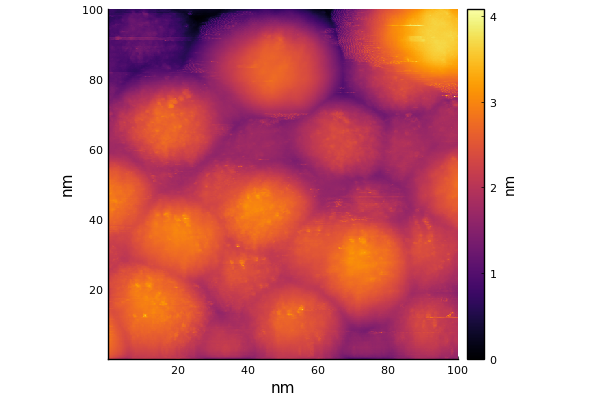

In [23]:
image = SPM.HDR.loadHDR("../data/B3446.hdr")
SPM.Plot.heatmap(image; legend=true)

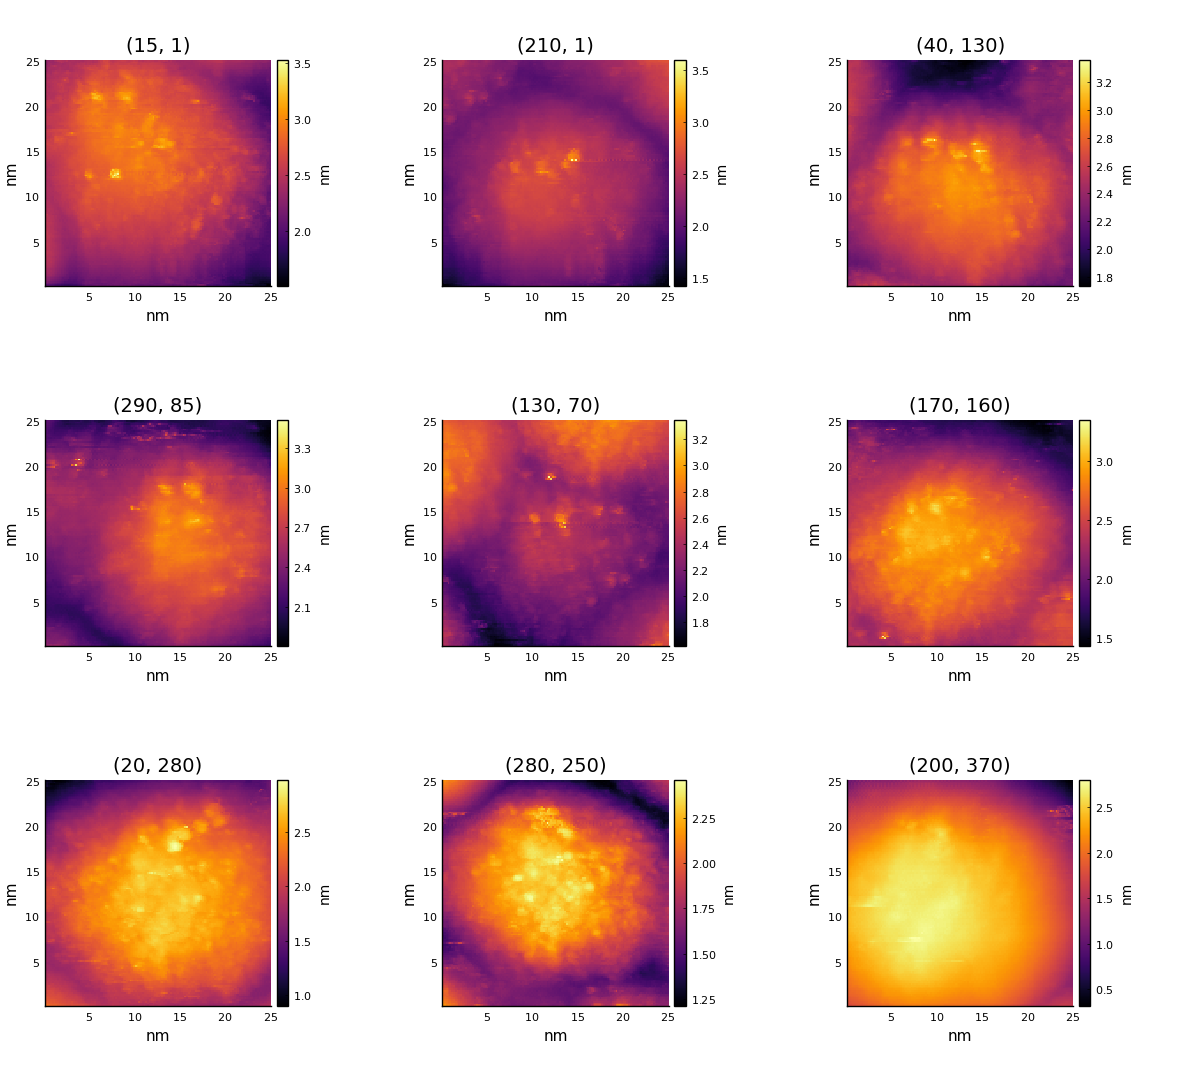

In [24]:
extract_size = (128,128)
lowerlefts = [
    (15,1), (210,1), (40,130), 
    (290,85), (130,70), (170, 160), 
    (20, 280), (280, 250), (200, 370)
]
plots = Vector{Plots.Plot}(undef, length(lowerlefts))
extracted_images = SPM.extract(image, lowerlefts, extract_size)
for i = eachindex(lowerlefts)
    plots[i] = SPM.Plot.heatmap(extracted_images[i]; title="$(lowerlefts[i])", legend=true)
end

plot(plots..., layout=(3,3), size=(1200, 1080))

In [25]:
# translate_tip_meanあり
tip_size = 128
max_epoch = 100
lambdas = [1.0e-8, 1e-6, 1e-4, 1e-2]
@time differentiableResults = SPM.BTR.solveDifferentiableBTR(
    extracted_images, tip_size, max_epoch, lambdas
)
println(typeof(differentiableResults))

[ Info: 4th thread : start solving for lambda = 1.0e-8
[ Info: 2th thread : start solving for lambda = 0.01
[ Info: 3th thread : start solving for lambda = 1.0e-6
[ Info: 1th thread : start solving for lambda = 0.0001
[ Info: 3th thread : optimizer setup completed
[ Info: 1th thread : optimizer setup completed
[ Info: 4th thread : optimizer setup completed
[ Info: 2th thread : optimizer setup completed
[ Info: 3th thread : 20th epoch completed in 523.183 sec
[ Info: 4th thread : 20th epoch completed in 525.042 sec
[ Info: 3th thread : 20th epoch completed in 528.072 sec
[ Info: 3th thread : 20th epoch completed in 544.151 sec
[ Info: 3th thread : 40th epoch completed in 1053.866 sec
[ Info: 2th thread : 40th epoch completed in 1054.457 sec
[ Info: 3th thread : 40th epoch completed in 1072.229 sec
[ Info: 4th thread : 40th epoch completed in 1073.487 sec
[ Info: 1th thread : 60th epoch completed in 1595.808 sec
[ Info: 2th thread : 60th epoch completed in 1600.724 sec
[ Info: 2th thread

2679.940155 seconds (6.98 M allocations: 15.807 GiB, 0.13% gc time, 0.05% compilation time)
Vector{Main.SPM.BTR.DifferentiableBTRResult}


[ Info: 3th thread : 100th epoch completed in 2679.671 sec
[ Info: 3th thread : 1th lambda completed


In [26]:
SPM.BTR.saveResults(extracted_images, differentiableResults, "differentiable_with_translate")

LoadError: InexactError: trunc(UInt16, NaN)

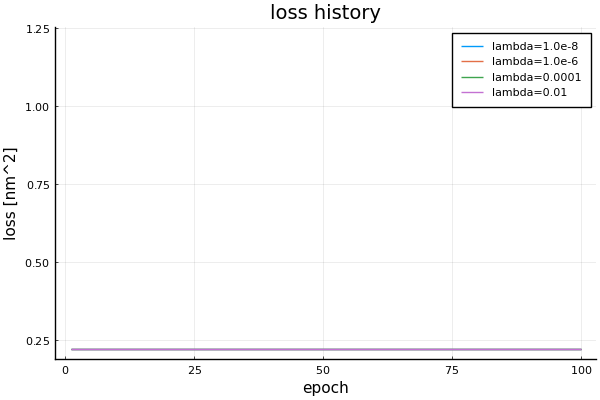

In [27]:
p = plot(title="loss history", xlabel="epoch", ylabel="loss [nm^2]")
for it = eachindex(differentiableResults)
    loss_history = differentiableResults[it].loss_history
    plot!(p, collect(1:max_epoch), loss_history, label="lambda=$(lambdas[it])")
end
p

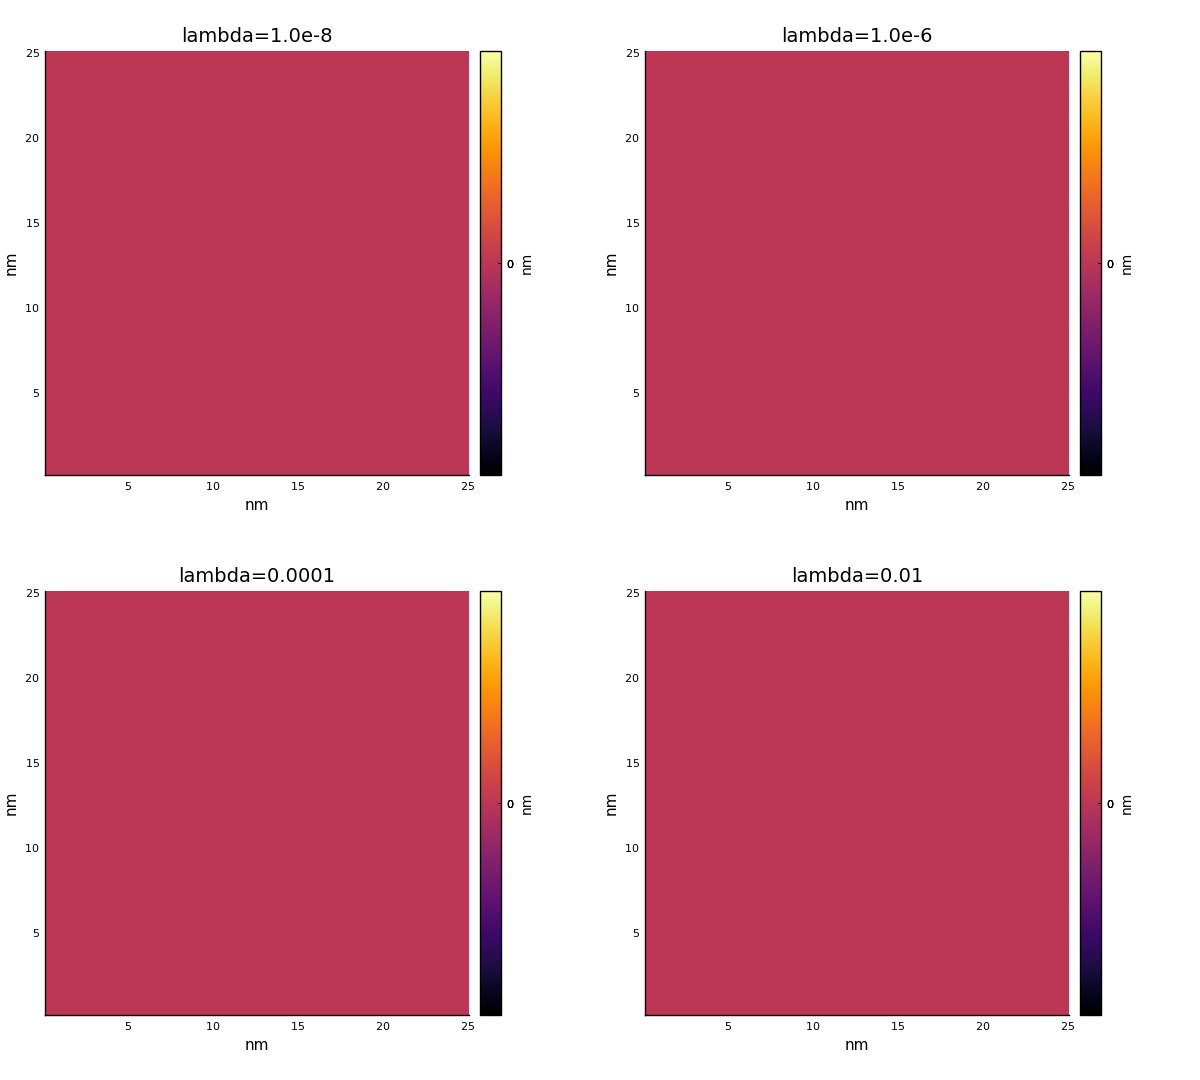

In [28]:
plots = Vector{Plots.Plot}(undef, length(differentiableResults))
for i = eachindex(differentiableResults)
    result_tip = differentiableResults[i].tip
    plots[i] = SPM.Plot.heatmap(result_tip; title="lambda=$(lambdas[i])", legend=true)
end
plot(plots..., layout=(2,2), size=(1200, 1080))

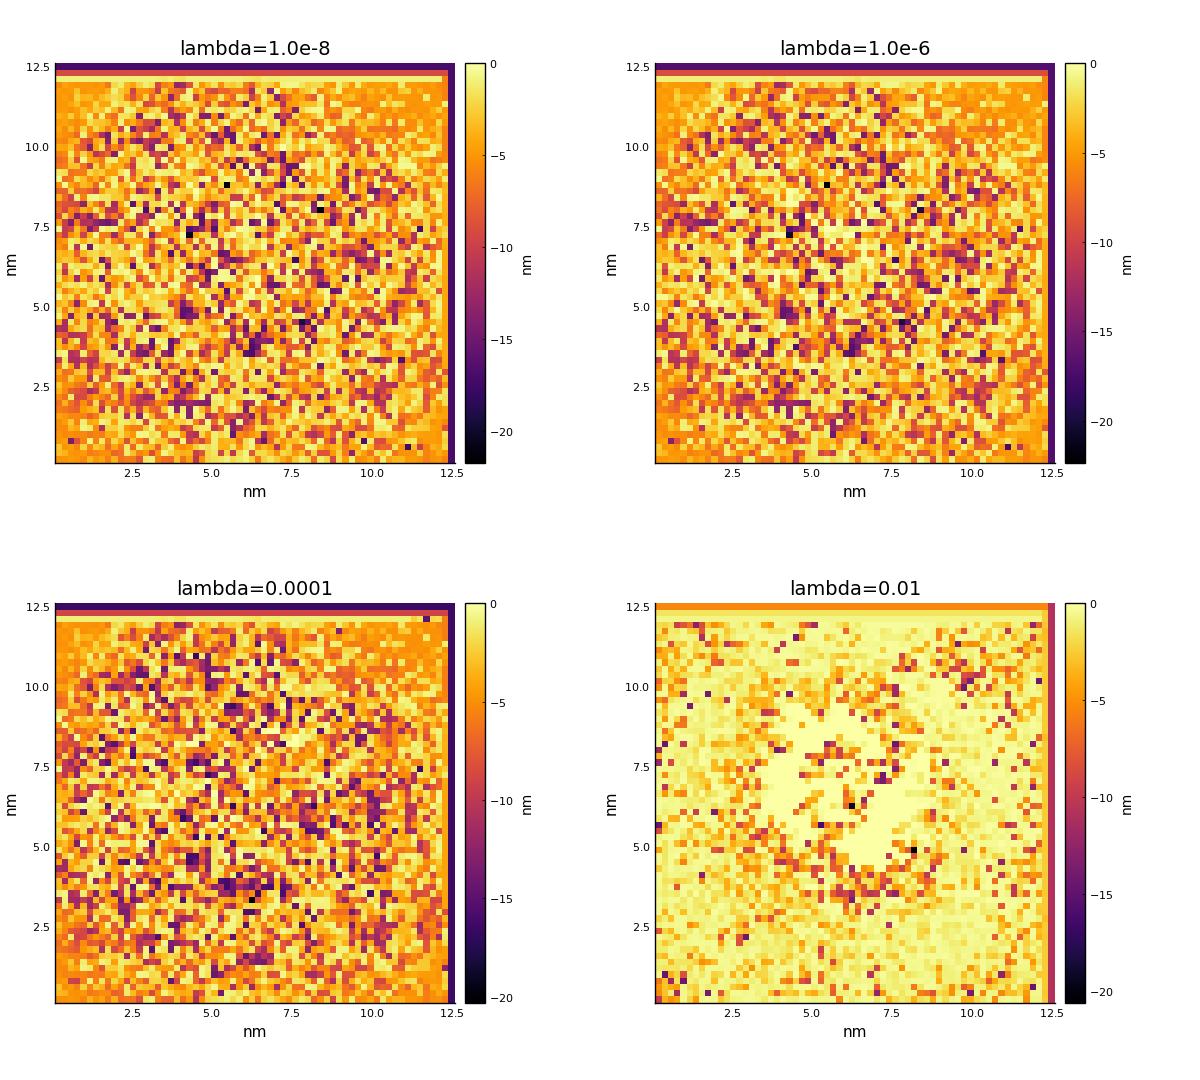

In [9]:
plots = Vector{Plots.Plot}(undef, length(differentiableResults))
for i = eachindex(differentiableResults)
    result_tip = differentiableResults[i].loss_minimizing_tip
    plots[i] = SPM.Plot.heatmap(result_tip; title="lambda=$(lambdas[i])", legend=true)
end
plot(plots..., layout=(2,2), size=(1200, 1080))